DataSet Name:- WineQuality-white.csv

DataSet Description Link:- https://archive.ics.uci.edu/ml/datasets/Wine+Quality

DataSet Download Link:- https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/

DataSet Description:-

Attribute Description:- Input variables (based on physicochemical tests): 1 - fixed acidity 2 - volatile acidity 3 - citric acid 4 - residual sugar 5 - chlorides 6 - free sulfur dioxide 7 - total sulfur dioxide 8 - density 9 - pH 10 - sulphates 11 - alcohol Output variable (based on sensory data): 12 - quality (score between 0 and 10)

Aim:- Implement a support vector machine algorithm

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("winequality.csv")

df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [2]:
df.shape

(400, 12)

In [3]:
x = df.iloc[:,:-1]
y = df.iloc[:,11]


In [4]:
x.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9


In [5]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=0)

In [6]:
print("Trianing data:",x_train.shape)
print("Test data:",x_test.shape)

Trianing data: (300, 11)
Test data: (100, 11)


In [7]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
x_train = sc_X.fit_transform(x_train)
x_test = sc_X.transform(x_test)

Applying the Support Vector Machine

In [8]:
from sklearn.svm import SVC
classifier = SVC(kernel='linear',random_state=0)
classifier.fit(x_train,y_train)

#predicting the test set results
y_pred = classifier.predict(x_test)

In [9]:
y_pred

array([5, 5, 6, 6, 7, 6, 5, 5, 5, 7, 5, 6, 5, 6, 6, 6, 6, 6, 6, 6, 7, 5,
       6, 6, 7, 6, 6, 7, 5, 5, 7, 6, 7, 5, 6, 7, 5, 7, 6, 7, 5, 6, 5, 6,
       7, 6, 7, 6, 8, 5, 7, 6, 5, 6, 7, 7, 6, 7, 6, 6, 6, 5, 6, 6, 5, 6,
       7, 6, 6, 7, 5, 6, 6, 8, 6, 5, 5, 5, 5, 6, 7, 6, 6, 6, 6, 5, 6, 6,
       5, 6, 6, 7, 6, 6, 6, 6, 6, 5, 6, 6], dtype=int64)

In [10]:
from sklearn import metrics
print("Accuracy Score: with linear kernel")
print(metrics.accuracy_score(y_test,y_pred))

Accuracy Score: with linear kernel
0.56


In [11]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf')
classifier.fit(x_train,y_train)
y_pred = classifier.predict(x_test)
print('Accuracy Score: with default rbf kernel')
print(metrics.accuracy_score(y_test,y_pred))

Accuracy Score: with default rbf kernel
0.59


In [12]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf',gamma = 5,C=6,random_state = 0)
classifier.fit(x_train,y_train)
y_pred = classifier.predict(x_test)
print(y_pred)
print('Accuracy Score: with default rbf kernel and Gamma and C value')
print(metrics.accuracy_score(y_test,y_pred))
print(metrics.classification_report(y_pred,y_test))

[6 6 6 6 6 6 6 5 5 7 6 6 5 6 6 6 6 6 5 5 6 5 6 5 6 5 6 6 6 6 6 6 6 6 6 6 6
 6 6 6 5 6 6 6 6 6 7 6 8 6 7 6 6 6 6 6 6 6 6 6 6 6 6 6 5 6 6 6 6 6 6 6 6 8
 6 6 6 6 6 6 6 6 6 5 6 6 6 6 5 6 7 6 6 6 4 6 6 7 6 6]
Accuracy Score: with default rbf kernel and Gamma and C value
0.59
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         1
           5       0.32      0.75      0.45        12
           6       0.91      0.54      0.68        80
           7       0.31      1.00      0.48         5
           8       0.33      1.00      0.50         2

    accuracy                           0.59       100
   macro avg       0.31      0.55      0.35       100
weighted avg       0.79      0.59      0.63       100



C:\Users\Lenovo\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


Gamma means the 
Low Gamma  = finding the gap between 2 points
High Gamma = check the gap between 2 closet point from gamma line

C value means adding some value to imporve the results
Low value of C if we have some error in skewed then it will usefull

In [13]:
svc = SVC(kernel = 'poly',degree=4)
svc.fit(x_train,y_train)

y_pred = svc.predict(x_test)
print('Accuracy Score: with poly kernel and Degree')
print(metrics.accuracy_score(y_test,y_pred))

Accuracy Score: with poly kernel and Degree
0.58


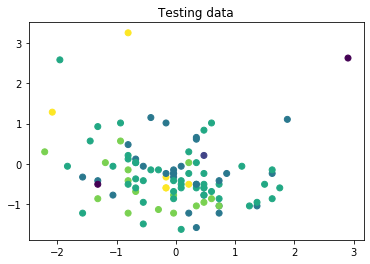

In [14]:
plt.scatter(x_test[:,0],x_test[:,1],c=y_test)
plt.title("Testing data")
plt.show()

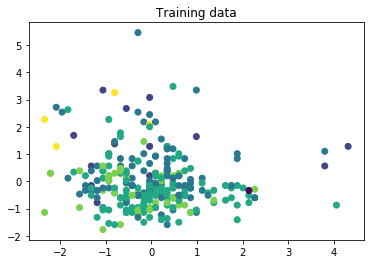

In [15]:
plt.scatter(x_train[:,0],x_train[:,1],c=y_train)
plt.title("Training data")
plt.show()

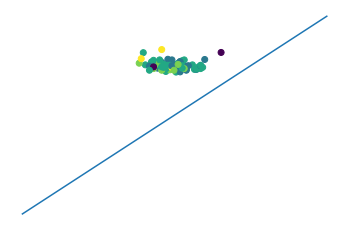

In [16]:
from sklearn.svm import SVC
classifier = SVC(kernel = "linear",random_state = 0)
classifier.fit(x_train,y_train)

#predicting the Test set Value
y_pred = classifier.predict(x_test)

#plotting the data points
plt.scatter(x_test[:,0],x_test[:,1],c=y_test)

w = classifier.coef_[0]
a = -w[0]/w[1]
xx = np.linspace(-9.5,9.5)
yy = a * xx - (classifier.intercept_[0])/w[1]
plt.plot(xx,yy)
plt.axis("off")
plt.show()